# Lead Scoring Case Study

The typical lead conversion rate at X education is around 30%.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’

X Education has appointed you to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted


Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
Higher score = Hot Lead – most likely to convert 
Lower score = Cold Lead – mostly not get converted
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well


## 1. Reading & Understanding Data (EDA)

In [1]:
# import required libraries and packages
# Supress Warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read the given CSV file, and view some sample records
lead = pd.read_csv("Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#inspect the various aspects of lead dataframe
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# summary statistics of data frame
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# number of unique values per feature
lead.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

In [7]:
# check duplicate records
lead.duplicated().sum()

0

In [8]:
# check null value count % in descending order
((lead.isnull().sum() / lead.shape[0]) * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Initial Data Understanding**
- ***The data has ~ 9k rows and 37 features***
- ***30 features are categorical, and 7 variables are numeric***
- ***It seems few features such as 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' has outliers***
- ***No duplicate records in the dataset***
- ***There are few features having single unique value e.g., "Receive More Updates About Our Courses", "Update me on Supply Chain Content"***
- ***There are 17 variables having null values***

### Data Cleaning

In [9]:
# categorize variables into categorical and numerical list
cat = pd.DataFrame(lead.dtypes).reset_index()

cat.rename(columns={"index":'col',0:'dtype'},inplace=True)

In [10]:
cat.head()

,col,dtype
0,Prospect ID,object
1,Lead Number,int64
2,Lead Origin,object
3,Lead Source,object
4,Do Not Email,object


In [11]:
cat_vars = cat[cat.dtype == 'object'].col.tolist()
print(cat_vars)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [12]:
num_vars = cat[(cat.dtype == 'int64') | (cat.dtype == 'float64')].col.tolist()
print(num_vars)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [13]:
# unique value counts of each categorical variables.
for i in cat_vars:
    print(i)
    print("------------------------------------------")
    print(lead[i].value_counts(ascending=False))
    print("------------------------------------------")

Prospect ID
------------------------------------------
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
------------------------------------------
Lead Origin
------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------
Lead Source
------------------------------------------
Google               2868
Direct Traffic       25

### Observations

**duplicate values**
- Lead Source : Google,google

**single value variables**
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

**Imbalance variables**
- Do Not Call
- What matters most to you in choosing a course
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

**Variables having "Select" level**
- Specialization
- How did you hear about X Education
- Lead Profile
- City

**Replacing 'google' with 'Google' in the 'Lead Source' variable**

In [14]:
lead['Lead Source'].replace('google','Google',inplace=True)

**Dropping variables having just one single level e.g.'No' and that would not contribute to infer the pattern**

In [15]:
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

**Observed that there are few variables record a value as 'Select'. It seems that customer did not select any option from the list so we can treat those values as null however need to convert into null**

In [16]:
lead = lead.replace('Select',np.nan)

In [17]:
lead.columns[lead.isin(['Select']).any()]

Index([], dtype='object')

In [18]:
# check all unique values from selected numerical varaibles
for i in num_vars:
    print(i)
    print("------------------------------------------")
    print(lead[i].value_counts(ascending=False))
    print("------------------------------------------")

Lead Number
------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
------------------------------------------
Converted
------------------------------------------
0    5679
1    3561
Name: Converted, dtype: int64
------------------------------------------
TotalVisits
------------------------------------------
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0

### Missing Value Handling

In [19]:
((lead.isnull().sum() / lead.shape[0]) * 100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Drop the columns having > 35% missing data as we should not impute becasue this would lead biased statistical analysis due to lack of natural variation**

In [20]:
lead.drop(lead.columns[lead.isnull().mean() > 0.35],axis=1,inplace=True)

In [21]:
((lead.isnull().sum() / lead.shape[0]) * 100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.0000

**Explore rest missing value variables**

In [22]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

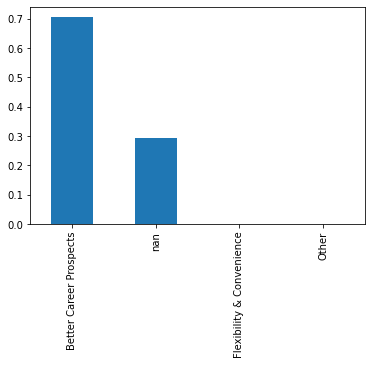

In [23]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False).plot.bar()
plt.show()

**It is good to drop this feature 'What matters most to you in choosing a course' becasue the data in this variables is skewed towards "Better Career Prospects"**

In [24]:
lead.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [25]:
lead['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

**~30% data is null so does not make sense to impute with the mode so lets impute with new category called 'Missing'**

In [26]:
lead['What is your current occupation'].fillna("Missing",inplace=True)

In [27]:
lead['What is your current occupation'].isnull().sum()

0

In [28]:
lead['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

**~26% data is null so does not make sense to impute with the mode so lets impute with new category called 'Missing'**

In [29]:
lead['Country'].fillna("Missing",inplace=True)

In [30]:
lead.Country.isnull().sum()

0

In [31]:
lead.TotalVisits.isnull().sum()

137

In [32]:
lead.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Missing value for 'TotalVisits varaible' can be imputed with median looking at difference between max and 75 percentile value that shows variable has extreme outlier.**

In [33]:
lead.TotalVisits.fillna(lead.TotalVisits.median(),inplace=True)

In [34]:
lead.TotalVisits.isnull().sum()

0

In [35]:
lead['Page Views Per Visit'].isnull().sum()

137

In [36]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [37]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace=True)

In [38]:
lead['Page Views Per Visit'].isnull().sum()

0

In [39]:
lead['Last Activity'].isnull().sum()

103

In [40]:
lead['Last Activity'].value_counts(normalize=True,dropna=False)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

**~38% data shows last activity is "Email Opened" so missing values can be replaced with the same**

In [41]:
lead['Last Activity'].fillna("Email Opened",inplace=True)

In [42]:
lead['Last Activity'].isnull().sum()

0

In [43]:
lead['Lead Source'].value_counts(normalize=True,dropna=False)

Google               0.310931
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

**~31% data shows lead score is "Google" so missing values can be replaced with the same**

In [44]:
lead['Lead Source'].fillna("Google",inplace=True)

In [45]:
lead['Lead Source'].isnull().sum()

0

In [46]:
((lead.isnull().sum() / lead.shape[0]) * 100).sort_values(ascending=False)

Prospect ID                               0.0
Country                                   0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Last Activity                             0.0
Lead Number                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
dtype: float64

In [47]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Missing,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,India,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,India,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,India,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,India,Unemployed,No,No,No,No,No,No,No,Modified


In [48]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity


### Univariate Analysis

Distribution of the Target variable 'Converted'

-  1 - customers who are successfully enrolled for online course of X Education
-  0 - customers who are not enrolled for online course of X Education

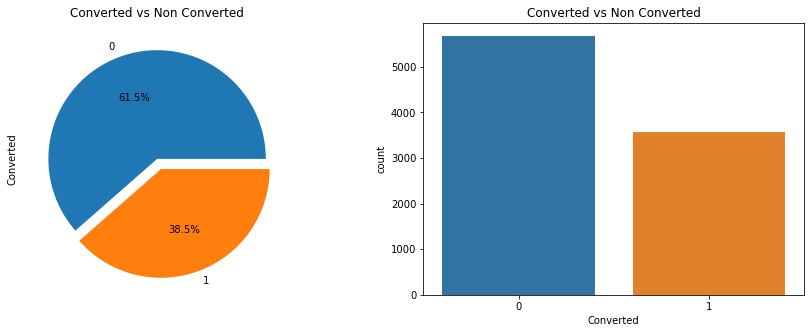

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
explode = (0,0.1)
lead.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode = explode)
plt.title("Converted vs Non Converted",loc="center")
plt.subplot(1,2,2)
sns.countplot(x=lead.Converted)
plt.title("Converted vs Non Converted",loc="center")
plt.show()

**Conversion Rate is 38.5%**

In [50]:
# lets categorize again variables into categorical and numerical list
cat = pd.DataFrame(lead.dtypes).reset_index()

cat.rename(columns={"index":'col',0:'dtype'},inplace=True)

In [51]:
cat_vars = cat[cat.dtype == 'object'].col.tolist()
cat_vars

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [52]:
cat_vars.remove('Prospect ID')

In [53]:
num_vars = cat[(cat.dtype == 'int64') | (cat.dtype == 'float64')].col.tolist()
num_vars

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

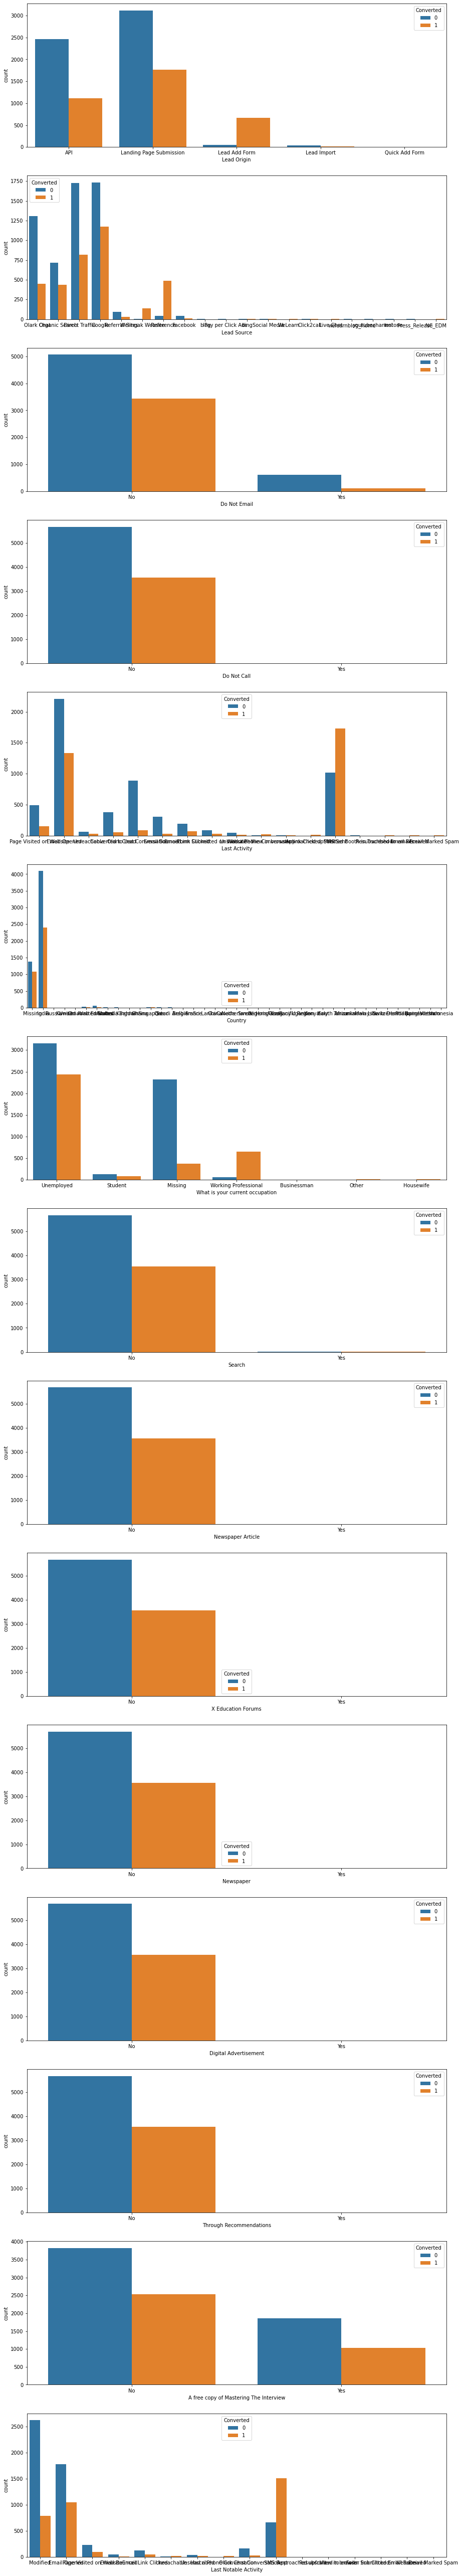

In [54]:
plt.figure(figsize=(15,100))
for i in range(len(cat_vars)):
    
    plt.subplot(16,1,1+i)
    sns.countplot(x=cat_vars[i],hue='Converted',data=lead)

In [55]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [56]:
lead['Lead Source'].value_counts(normalize=True)

Google               0.314827
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

**Lets group all values < 1%**

In [57]:
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','bing','Click2call',
                                                   'Social Media','Live Chat','Press_Release','Pay per Click Ads',
                                                   'blog','WeLearn','welearnblog_Home','youtubechannel','testone',
                                                  'NC_EDM'],'Others Lead Source')

In [58]:
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

**Lead Source varaible has many unique levels having very less contributing % so it is better to group all that levels under single level**

**lets consider values that shows < 1% contribution in the data**

In [59]:
lead['Last Activity'] = lead['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation',
                                                       'Approached upfront','View in browser link Clicked',
                                                       'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                      'Resubscribed to emails'],'Other Last Activities')

In [60]:
lead.Country.value_counts(normalize=True)

India                   0.702597
Missing                 0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

**It seems the majority of leads comes from India ~70 and only ~4% leads comes from foreign countries so why not group all foreign countries under single value called "Foreign"**

In [61]:
lead['Country'] = np.where(((lead.Country != 'India') & (lead.Country != 'Missing')),'Foreign',lead.Country)

In [62]:
lead.Country.value_counts(normalize=True)

India      0.702597
Missing    0.266342
Foreign    0.031061
Name: Country, dtype: float64

In [63]:
lead['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

**'Last Notable Activity' varaible has many unique levels having very less contributing % so it is better to group all that levels unedr single level**

**lets consider values that shows < 1% contribution in the data**

In [64]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                       'Had a Phone Conversation','Email Marked Spam',
                                                                       'Approached upfront','Resubscribed to emails',
                                                                      'View in browser link Clicked',
                                                                       'Form Submitted on Website','Email Received'],
                                                                     'Other Notable Activities')

In [65]:
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [66]:
lead['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [67]:
lead['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [68]:
lead['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [69]:
lead['Newspaper'].value_counts(normalize=True) 

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [70]:
lead['Digital Advertisement'].value_counts(normalize=True) 

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [71]:
lead['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

**Dropping all the variables having extremly highly imbalance distribution that would not infer any insights to model**

In [72]:
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations'],axis=1,inplace=True)

In [73]:
cat = pd.DataFrame(lead.dtypes).reset_index()

cat.rename(columns={"index":'col',0:'dtype'},inplace=True)

In [74]:
cat_vars = cat[cat.dtype == 'object'].col.tolist()

In [75]:
cat_vars

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [76]:
cat_vars.remove('Prospect ID')

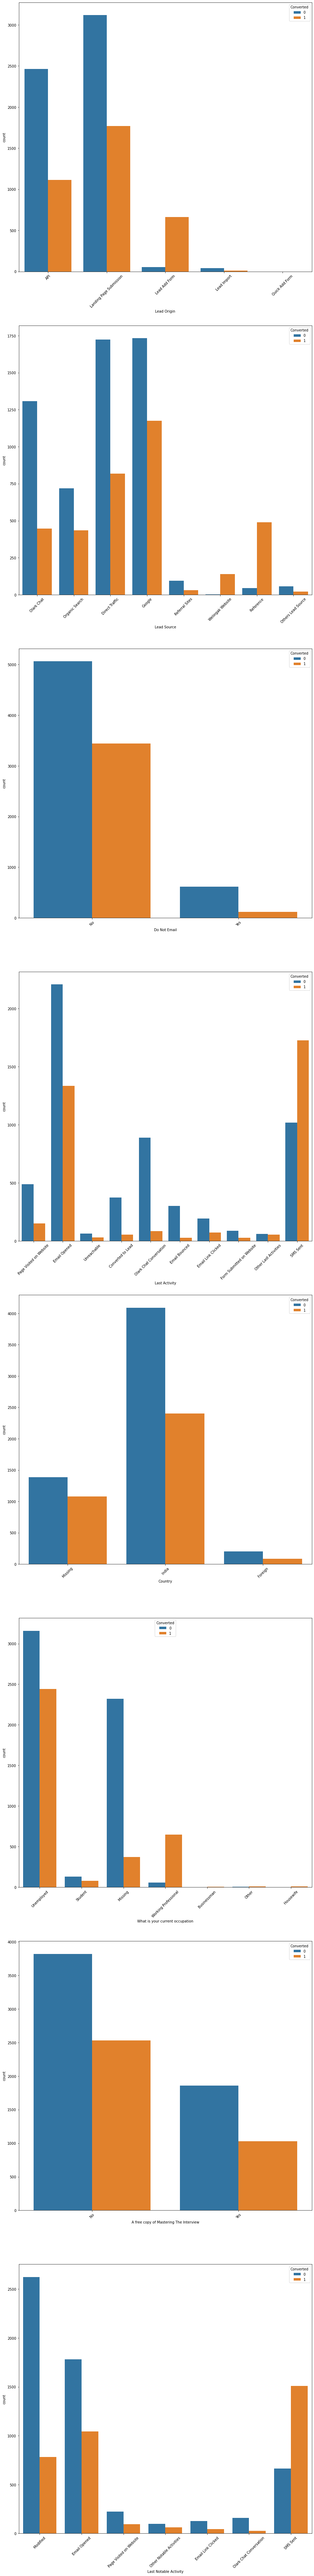

In [77]:
plt.figure(figsize=(15,150))
for i in range(len(cat_vars)):
    
    plt.subplot(9,1,1+i)
    sns.countplot(x=cat_vars[i],hue='Converted',data=lead)
    plt.xticks(rotation=45)

In [78]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,Modified


In [79]:
LeadOrigin = lead.pivot_table(values='Lead Number',index='Lead Origin',columns='Converted',aggfunc='count').fillna(0)

LeadOrigin['Conversion Rate'] = (LeadOrigin[1] / (LeadOrigin[0] + LeadOrigin[1]) * 100)

LeadOrigin.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Lead Origin,,,
Quick Add Form,0.0,1.0,100.000000
Lead Add Form,54.0,664.0,92.479109
Landing Page Submission,3118.0,1768.0,36.185018
API,2465.0,1115.0,31.145251
Lead Import,42.0,13.0,23.636364


**"Lead Add Form" has highest conversion rate ~92 %**

**"Quick Add Form can be ignored since it has very less values"**

In [80]:
LeadSource = lead.pivot_table(values='Lead Number',index='Lead Source',columns='Converted',aggfunc='count').fillna(0)

LeadSource['Conversion Rate'] = (LeadSource[1] / (LeadSource[0] + LeadSource[1]) * 100)

LeadSource.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Lead Source,,,
Welingak Website,2,140,98.591549
Reference,44,490,91.760300
Google,1733,1176,40.426263
Organic Search,718,436,37.781629
Direct Traffic,1725,818,32.166732
Others Lead Source,56,22,28.205128
Olark Chat,1307,448,25.527066
Referral Sites,94,31,24.800000


**"Welingak Website" is having highest conversion rate ~98 %**

**Others Lead Source and Google are having good conversion rate**

**"Reference also has high conversion rate"**

In [81]:
DoNotEmail = lead.pivot_table(values='Lead Number',index='Do Not Email',columns='Converted',aggfunc='count').fillna(0)

DoNotEmail['Conversion Rate'] = (DoNotEmail[1] / (DoNotEmail[0] + DoNotEmail[1]) * 100)

DoNotEmail.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Do Not Email,,,
No,5063,3443,40.477310
Yes,616,118,16.076294


**Lead Conversion Rate is compritavely good for leads those wanted X Education shall send an email**

In [82]:
LastActivity = lead.pivot_table(values='Lead Number',index='Last Activity',columns='Converted',aggfunc='count').fillna(0)

LastActivity['Conversion Rate'] = (LastActivity[1] / (LastActivity[0] + LastActivity[1]) * 100)

LastActivity.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Last Activity,,,
SMS Sent,1018,1727,62.914390
Other Last Activities,59,53,47.321429
Email Opened,2206,1334,37.683616
Unreachable,62,31,33.333333
Email Link Clicked,194,73,27.340824
Form Submitted on Website,88,28,24.137931
Page Visited on Website,489,151,23.593750
Converted to Lead,374,54,12.616822
Olark Chat Conversation,889,84,8.633094


**Customers whose Last Activity = "SMS Sent" has high probability of conversion.**

In [83]:
Country = lead.pivot_table(values='Lead Number',index='Country',columns='Converted',aggfunc='count').fillna(0)

Country['Conversion Rate'] = (Country[1] / (Country[0] + Country[1]) * 100)

Country.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Country,,,
Missing,1385,1076,43.722064
India,4091,2401,36.983980
Foreign,203,84,29.268293


**Slighly high conversion rate for customers who comes from India comparatively to other countries**

In [84]:
Whatisyourcurrentoccupation = lead.pivot_table(values='Lead Number',index='What is your current occupation',columns='Converted',aggfunc='count').fillna(0)

Whatisyourcurrentoccupation['Conversion Rate'] = (Whatisyourcurrentoccupation[1] / (Whatisyourcurrentoccupation[0] + Whatisyourcurrentoccupation[1]) * 100)

Whatisyourcurrentoccupation.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
What is your current occupation,,,
Housewife,0.0,10.0,100.000000
Working Professional,59.0,647.0,91.643059
Businessman,3.0,5.0,62.500000
Other,6.0,10.0,62.500000
Unemployed,3159.0,2441.0,43.589286
Student,132.0,78.0,37.142857
Missing,2320.0,370.0,13.754647


**Working Professionals and Housewifes are more interseted for online courses and Students are relatively low because they might got already enrolled for other study**

In [85]:
Interview = lead.pivot_table(values='Lead Number',index='A free copy of Mastering The Interview',columns='Converted',aggfunc='count').fillna(0)

Interview['Conversion Rate'] = (Interview[1] / (Interview[0] + Interview[1]) * 100)

Interview.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
A free copy of Mastering The Interview,,,
No,3821,2531,39.845718
Yes,1858,1030,35.664820


In [86]:
LastNotableActivity = lead.pivot_table(values='Lead Number',index='Last Notable Activity',columns='Converted',aggfunc='count').fillna(0)

LastNotableActivity['Conversion Rate'] = (LastNotableActivity[1] / (LastNotableActivity[0] + LastNotableActivity[1]) * 100)

LastNotableActivity.sort_values(ascending=False,by='Conversion Rate')

Converted,0,1,Conversion Rate
Last Notable Activity,,,
SMS Sent,664,1508,69.429098
Other Notable Activities,97,63,39.375000
Email Opened,1783,1044,36.929607
Page Visited on Website,225,93,29.245283
Email Link Clicked,128,45,26.011561
Modified,2624,783,22.982096
Olark Chat Conversation,158,25,13.661202


**Customers whose Last Notable Activity = "SMS Sent" has high probability of conversion.**

### Outlier Handling

In [87]:
num_vars

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [88]:
# Not applicable for Outlier analysis
num_vars.remove('Lead Number')

In [89]:
# Not applicable for Outlier analysis
num_vars.remove('Converted')

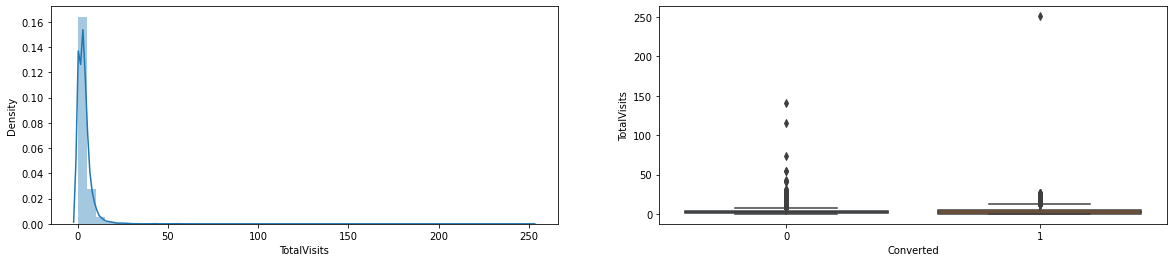

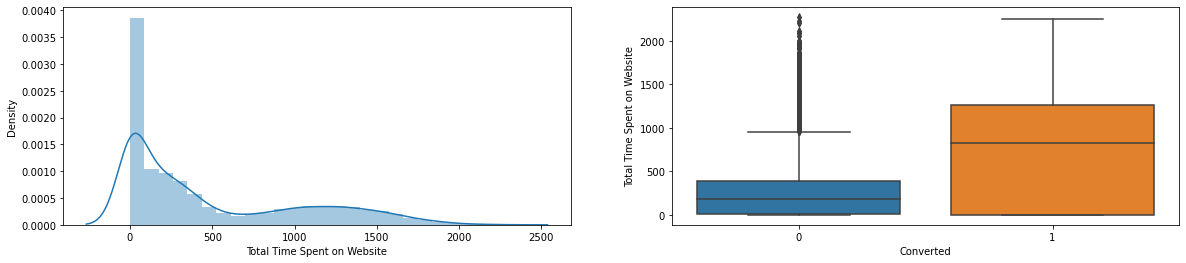

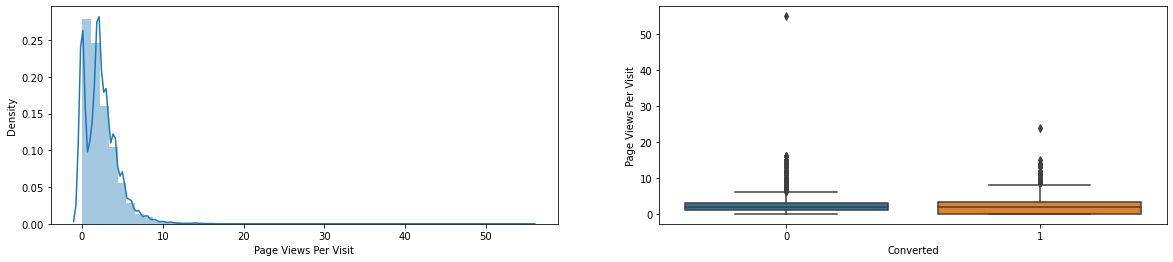

In [90]:
for i in num_vars:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(lead[i])
    plt.subplot(1,2,2)
    sns.boxplot(y=lead[i],x=lead['Converted'])
    plt.show()

In [91]:
lead.TotalVisits.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [92]:
lead[lead.TotalVisits >= lead.TotalVisits.quantile(0.99)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
58,d93bfdc0-4719-4f0a-ad6b-31070823dfbb,659942,Landing Page Submission,Organic Search,No,0,17.0,409,8.50,Email Opened,India,Unemployed,Yes,Modified
281,988b81fb-a186-4163-8513-2f187adaf678,657423,Landing Page Submission,Referral Sites,No,0,17.0,71,3.40,Unreachable,India,Unemployed,No,Modified
345,b852d04d-932a-4afd-8ab6-5be1b22ca1cf,656743,Landing Page Submission,Organic Search,No,1,21.0,1113,2.63,Email Opened,India,Unemployed,Yes,Email Opened
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,0,22.0,59,5.50,Page Visited on Website,India,Unemployed,Yes,Page Visited on Website
663,f45f8039-d948-4004-9e1b-c56efbab9747,653687,Landing Page Submission,Google,No,1,21.0,1885,3.50,Email Opened,India,Unemployed,Yes,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,017e2844-cdde-41d0-ba20-da863968dcbd,583931,Landing Page Submission,Google,No,1,27.0,573,1.93,Page Visited on Website,India,Unemployed,Yes,Page Visited on Website
8684,15c1191e-09a1-49b3-b3e5-d9207e7502fc,583534,API,Google,No,1,23.0,1341,2.09,SMS Sent,India,Missing,No,Modified
8827,5f424d7a-721b-4a47-ba70-7c1d820129ce,582560,Landing Page Submission,Organic Search,No,0,23.0,194,11.50,Email Opened,India,Unemployed,Yes,Email Opened
9016,8ffde4a8-67e8-4f3c-af75-401590d300c0,581254,Landing Page Submission,Direct Traffic,No,1,25.0,1569,2.08,Email Opened,India,Working Professional,Yes,Email Opened


In [93]:
# lets cap the data at 99 percentile

lead.TotalVisits = np.where(lead.TotalVisits >= lead.TotalVisits.quantile(0.99),lead.TotalVisits.quantile(0.99),
                            lead.TotalVisits)

In [94]:
lead.TotalVisits.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99])

count    9240.000000
mean        3.327814
std         3.228466
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [95]:
lead['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [96]:
# lets cap the data at 99 percentile

lead['Page Views Per Visit'] = np.where(lead['Page Views Per Visit'] >= lead['Page Views Per Visit'].quantile(0.99),
                                        lead['Page Views Per Visit'].quantile(0.99),
                            lead['Page Views Per Visit'])

In [97]:
lead['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99])

count    9240.000000
mean        2.329050
std         1.971347
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
98%         8.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

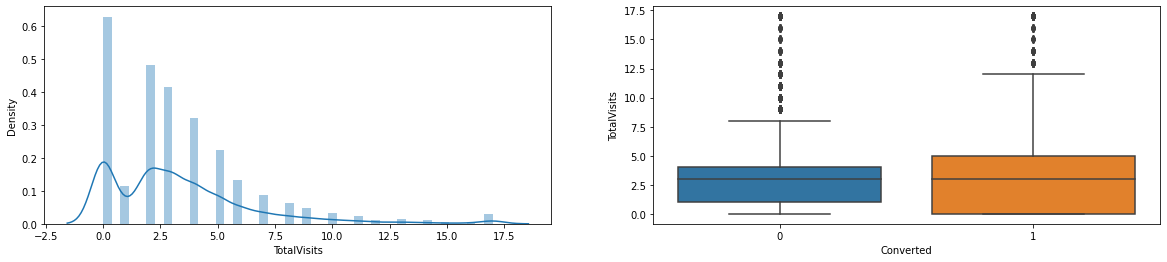

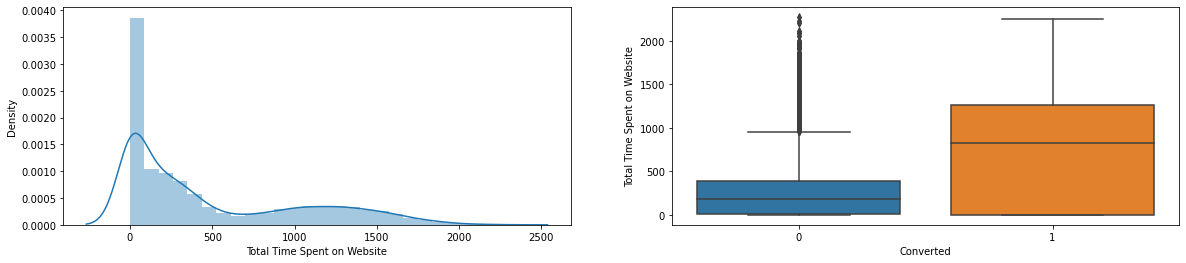

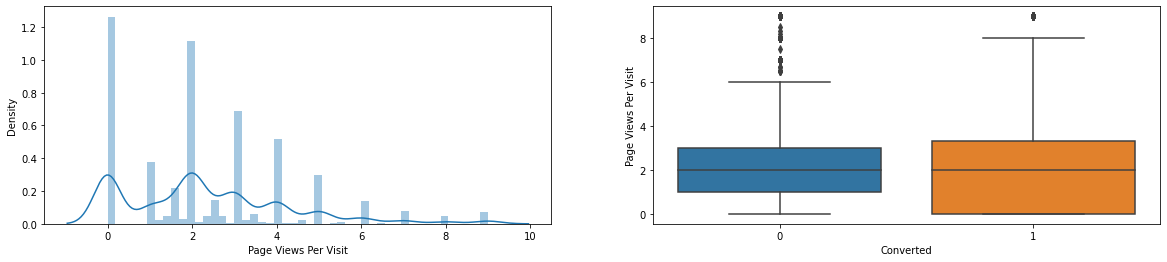

In [98]:
for i in num_vars:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(lead[i])
    plt.subplot(1,2,2)
    sns.boxplot(y=lead[i],x=lead['Converted'])
    plt.show()

#### Observations

####  Maximum Total Visits on the websites slightly increase the probability of conversion.
#### people who are spending more time on website have more probability of conversion than people who spent less time on website.
#### 1-3 pages per visit gets equal chance of conversion

## Bivariate Analysis

In [99]:
num_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

<Figure size 1440x360 with 0 Axes>

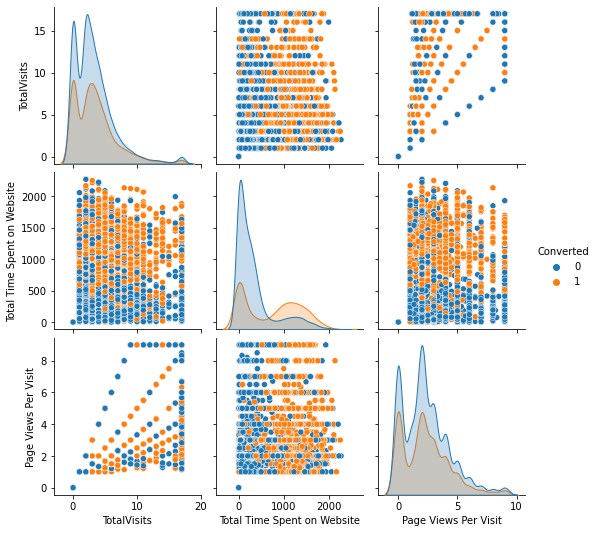

In [100]:
plt.figure(figsize=(20,5))

sns.pairplot(data=lead,vars=num_vars,diag_kind='kde',hue='Converted')
plt.show()

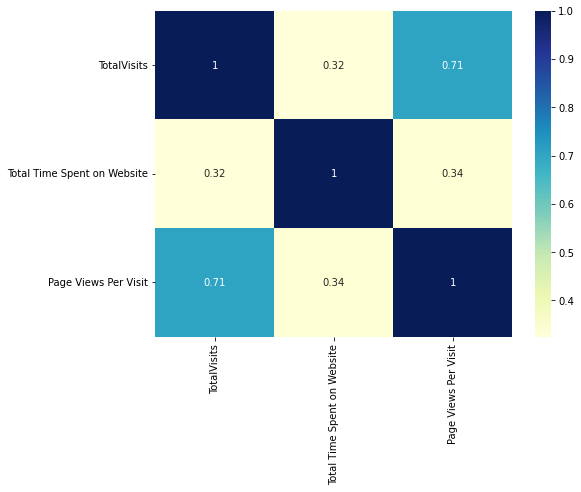

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(data=lead[num_vars].corr(),annot=True,cmap='YlGnBu')
plt.show()

**There is good correlation between "TotalVisits" and "Page Views Per Visit" features.  We should drop one of the feature to avoid multicollinarity**

## 2. Data Preparation for Model Building

### Encoding: Converting Binary Categorical variables into Binary Numerical (0/1)

In [102]:
for i in cat_vars:
    print(i,":",lead[i].unique())

Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Others Lead Source']
Do Not Email : ['No' 'Yes']
Last Activity : ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Other Last Activities'
 'SMS Sent']
Country : ['Missing' 'India' 'Foreign']
What is your current occupation : ['Unemployed' 'Student' 'Missing' 'Working Professional' 'Businessman'
 'Other' 'Housewife']
A free copy of Mastering The Interview : ['No' 'Yes']
Last Notable Activity : ['Modified' 'Email Opened' 'Page Visited on Website'
 'Other Notable Activities' 'Email Link Clicked' 'Olark Chat Conversation'
 'SMS Sent']


In [103]:
bin_cat_vars = ['Do Not Email','A free copy of Mastering The Interview']

In [104]:
def binary_map(x):
    return x.map({'Yes':1,"No":0})

lead[bin_cat_vars].apply(binary_map)

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,1
9237,1,1
9238,0,0


In [105]:
lead.iloc[9237:9240]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.0,SMS Sent,India,Unemployed,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.0,SMS Sent,India,Missing,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,1,6.0,1279,3.0,SMS Sent,Foreign,Unemployed,Yes,Modified


In [106]:
lead[bin_cat_vars] = lead[bin_cat_vars].apply(binary_map)

In [107]:
lead.iloc[9237:9240]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.0,SMS Sent,India,Unemployed,1,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,1,3.0,499,3.0,SMS Sent,India,Missing,0,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,0,1,6.0,1279,3.0,SMS Sent,Foreign,Unemployed,1,Modified


### One Hot Encoding: Create dummy features for categorical variables with multiple levels

In [108]:
cat_vars

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [109]:
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity',
                             'Last Notable Activity']],drop_first=True)

lead = pd.concat([lead,dummy1],axis=1)

In [110]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Activity_Other Last Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,1,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0


In [111]:
# drop the original features that converted into dummy variables

lead.drop(['Lead Origin','Lead Source','Last Activity',
                             'Last Notable Activity'],axis=1,inplace=True)

In [112]:
# creating dummy variables for country
dummy2 = pd.get_dummies(lead['Country'], prefix='Country')
dummy2

,Country_Foreign,Country_India,Country_Missing
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9235,1,0,0
9236,0,1,0
9237,0,1,0
9238,0,1,0


In [113]:
dummy2 = dummy2.drop(['Country_Missing'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,dummy2], axis=1)

In [114]:
# creating dummy variables for What is your current occupation


dummy3 = pd.get_dummies(lead['What is your current occupation'], prefix='What is your current occupation')
dummy3

,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
9235,0,0,0,0,0,1,0
9236,0,0,0,0,0,1,0
9237,0,0,0,0,0,1,0
9238,0,0,1,0,0,0,0


In [115]:
dummy3 = dummy3.drop(['What is your current occupation_Missing'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,dummy3], axis=1)

In [116]:
lead.drop(['Country','What is your current occupation'],axis=1,inplace=True)

In [117]:
lead.dtypes

Prospect ID                                              object
Lead Number                                               int64
Do Not Email                                              int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Lead Import                                   uint8
Lead Origin_Quick Add Form                                uint8
Lead Source_Google                                        uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Lead Source_Others Lead Source          

### Train-Test Split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X = lead.drop(['Prospect ID','Lead Number','Converted'],axis=1)

In [120]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Foreign,Country_India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [121]:
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
X.nunique()

Do Not Email                                               2
TotalVisits                                               18
Total Time Spent on Website                             1731
Page Views Per Visit                                     102
A free copy of Mastering The Interview                     2
Lead Origin_Landing Page Submission                        2
Lead Origin_Lead Add Form                                  2
Lead Origin_Lead Import                                    2
Lead Origin_Quick Add Form                                 2
Lead Source_Google                                         2
Lead Source_Olark Chat                                     2
Lead Source_Organic Search                                 2
Lead Source_Others Lead Source                             2
Lead Source_Reference                                      2
Lead Source_Referral Sites                                 2
Lead Source_Welingak Website                               2
Last Activity_Email Boun

In [125]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Foreign,Country_India,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,0.205373,0.005716,-0.503379,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0,0.512365,1.365219,1.364995,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Correlation Check

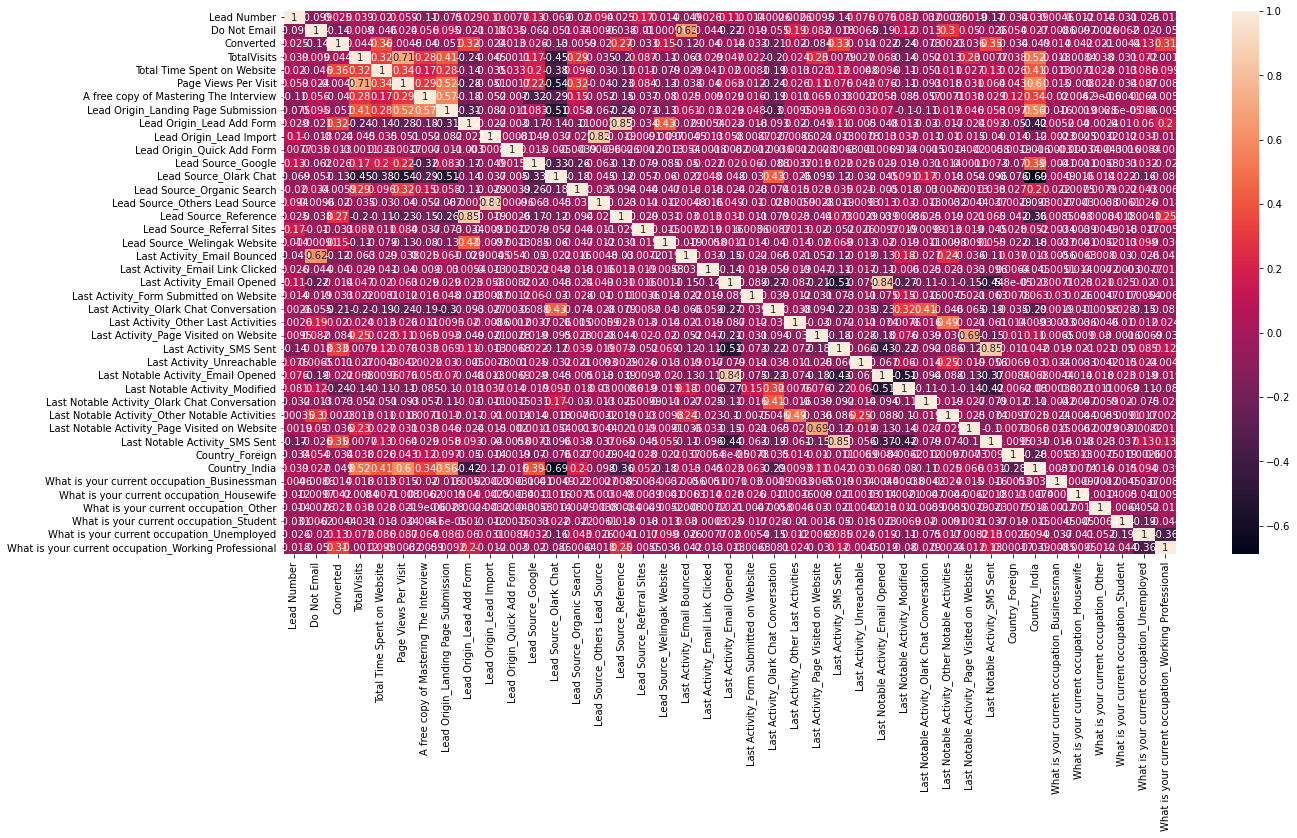

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(lead.corr(),annot=True)
plt.show()

#### Creating correlation dataframe to easily find highly correlated features

In [127]:
corr_df = pd.DataFrame(lead.corr().abs())

In [128]:
corr_df = corr_df.unstack()

In [129]:
corr_df = corr_df.sort_values(kind="quicksort")

In [130]:
corr_df

What is your current occupation_Other                 A free copy of Mastering The Interview                  0.000005
A free copy of Mastering The Interview                What is your current occupation_Other                   0.000005
Last Activity_Email Opened                            Country_Foreign                                         0.000058
Country_Foreign                                       Last Activity_Email Opened                              0.000058
What is your current occupation_Student               Lead Origin_Landing Page Submission                     0.000066
                                                                                                                ...   
Last Activity_Page Visited on Website                 Last Activity_Page Visited on Website                   1.000000
Last Activity_Other Last Activities                   Last Activity_Other Last Activities                     1.000000
Last Activity_Olark Chat Conversation           

#### Highly Corrlated variables

##### TotalVisits,
##### Country_India,
##### Last Activity_SMS Sent,
##### Last Activity_Page Visited on Website,
##### Lead Origin_Lead Add Form,
##### Last Activity_Email Opened,
##### Lead Source_Others Lead Source,
##### Last Activity_Email Bounced

**Dropping highly correlated dummy variables to avoid multicollinearity**

In [132]:
X_train = X_train.drop(['TotalVisits','Country_India','Last Activity_SMS Sent',
                      'Last Activity_Page Visited on Website','Lead Origin_Lead Add Form',
                        'Last Activity_Email Opened','Lead Source_Others Lead Source',
                        'Last Activity_Email Bounced'],axis=1)

In [133]:
X_train.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Other Notable Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Foreign,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0,-0.691418,0.092260,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8105,0,1.365219,1.364995,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,0,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 3. Model Building

### Feature Selection using RFE

In [134]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [135]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)

rfe = rfe.fit(X_train,y_train)

In [136]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activities', True, 1),
 ('Last Activity_Unreachable', False, 17),
 ('Last Notable Activity_Email Opened', False, 14),
 ('Last Notable Activity_Modified', False, 3),
 ('Last Notable Activity_Olark Chat Conversation', False, 10),
 ('Last Notable Activity_Other Notable Activ

In [137]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activities',
       'Last Notable Activity_Other Notable Activities',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 1

In [138]:
X_train_sm = sm.add_constant(X_train[rfe_col])

loregm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res = loregm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.4
Date:                Mon, 02 Jan 2023   Deviance:                       5316.7
Time:                        19:18:14   Pearson chi2:                 7.10e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9550      0.102    -19.147      0.000      -2.155      -1.755
Do Not Email                                            -1.5728      0.180     -8.742      0.000      -1.925      -1.220
Total Time Spent on Website                              1.0695      0.039     27.274      0.000       0.993       1.146
Lead Origin_Landing Page Submission                     -0.4056      0.087     -4.659      0.000      -0.576      -0.235
Lead Source_Olark Chat                                   0.9945      0.118      8.446      0.000       0.764       1.225
Lead Source_Reference                                    3.2220      0.212     15.200      0.000       2.807       3.637
Lead Source_Welingak Website                             5.1370      0.727      7.063      0.000       3.711       6.563
Last Activity_Olark Chat Conversation                   -1.2674      0.165     -7.659      0.000      -1.592      -0.943
Last Activity_Other Last Activities                      0.7161      0.358      1.999      0.046       0.014       1.418
Last Notable Activity_Other Notable Activities           1.2453      0.307      4.053      0.000       0.643       1.848
Last Notable Activity_SMS Sent                           1.5020      0.079     18.939      0.000       1.347       1.657
What is your current occupation_Housewife               23.9214   1.37e+04      0.002      0.999   -2.69e+04     2.7e+04
What is your current occupation_Other                    0.9783      0.777      1.260      0.208      -0.544       2.500
What is your current occupation_Student                  1.1992      0.237      5.064      0.000       0.735       1.663
What is your current occupation_Unemployed               1.0686      0.087     12.279      0.000       0.898       1.239
What is your current occupation_Working Professional     3.5504      0.197     18.028      0.000       3.164       3.936
========================================================================================================================
"""

### Check VIF (Variance Inflation Factor)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif = pd.DataFrame()
vif['Feature'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
13,What is your current occupation_Unemployed,2.39
2,Lead Origin_Landing Page Submission,2.14
3,Lead Source_Olark Chat,1.70
8,Last Notable Activity_Other Notable Activities,1.43
9,Last Notable Activity_SMS Sent,1.43
6,Last Activity_Olark Chat Conversation,1.37
14,What is your current occupation_Working Profes...,1.35
7,Last Activity_Other Last Activities,1.34
4,Lead Source_Reference,1.32
1,Total Time Spent on Website,1.25


**VIF of all features is below 5, that shows there is no multicollinarity among the independent variables**

**p-value for "What is your current occupation_Other" and "What is your current occupation_Housewife"**

**However, lets drop first "What is your current occupation_Housewife" feature**

In [141]:
rfe_col = rfe_col.drop('What is your current occupation_Housewife',1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activities',
       'Last Notable Activity_Other Notable Activities',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Re-build Model - Model 2

In [142]:
X_train_sm = sm.add_constant(X_train[rfe_col])

loregm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res = loregm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.9
Date:                Mon, 02 Jan 2023   Deviance:                       5339.8
Time:                        19:18:14   Pearson chi2:                 7.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9260      0.101    -19.006      0.000      -2.125      -1.727
Do Not Email                                            -1.5791      0.180     -8.783      0.000      -1.931      -1.227
Total Time Spent on Website                              1.0678      0.039     27.294      0.000       0.991       1.144
Lead Origin_Landing Page Submission                     -0.3940      0.087     -4.536      0.000      -0.564      -0.224
Lead Source_Olark Chat                                   0.9903      0.118      8.426      0.000       0.760       1.221
Lead Source_Reference                                    3.2777      0.212     15.476      0.000       2.863       3.693
Lead Source_Welingak Website                             5.1436      0.727      7.072      0.000       3.718       6.569
Last Activity_Olark Chat Conversation                   -1.2734      0.165     -7.703      0.000      -1.597      -0.949
Last Activity_Other Last Activities                      0.7109      0.358      1.985      0.047       0.009       1.413
Last Notable Activity_Other Notable Activities           1.2434      0.307      4.050      0.000       0.642       1.845
Last Notable Activity_SMS Sent                           1.4939      0.079     18.860      0.000       1.339       1.649
What is your current occupation_Other                    0.9450      0.777      1.217      0.224      -0.577       2.467
What is your current occupation_Student                  1.1637      0.237      4.916      0.000       0.700       1.628
What is your current occupation_Unemployed               1.0347      0.086     12.013      0.000       0.866       1.204
What is your current occupation_Working Professional     3.5140      0.196     17.884      0.000       3.129       3.899
========================================================================================================================
"""

In [143]:
vif = pd.DataFrame()
vif['Feature'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
12,What is your current occupation_Unemployed,2.38
2,Lead Origin_Landing Page Submission,2.13
3,Lead Source_Olark Chat,1.70
8,Last Notable Activity_Other Notable Activities,1.43
9,Last Notable Activity_SMS Sent,1.43
6,Last Activity_Olark Chat Conversation,1.37
13,What is your current occupation_Working Profes...,1.35
7,Last Activity_Other Last Activities,1.34
4,Lead Source_Reference,1.31
1,Total Time Spent on Website,1.25


**Drop "What is your current occupation_Other" variable and re-build model**

In [144]:
rfe_col = rfe_col.drop('What is your current occupation_Other',1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activities',
       'Last Notable Activity_Other Notable Activities',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Re-build Model - Model 3

In [145]:
X_train_sm = sm.add_constant(X_train[rfe_col])

loregm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res = loregm3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.6
Date:                Mon, 02 Jan 2023   Deviance:                       5341.1
Time:                        19:18:14   Pearson chi2:                 7.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9178      0.101    -18.989      0.000      -2.116      -1.720
Do Not Email                                            -1.5747      0.180     -8.763      0.000      -1.927      -1.222
Total Time Spent on Website                              1.0688      0.039     27.323      0.000       0.992       1.145
Lead Origin_Landing Page Submission                     -0.3941      0.087     -4.537      0.000      -0.564      -0.224
Lead Source_Olark Chat                                   0.9880      0.117      8.409      0.000       0.758       1.218
Lead Source_Reference                                    3.2775      0.212     15.477      0.000       2.862       3.693
Lead Source_Welingak Website                             5.1435      0.727      7.072      0.000       3.718       6.569
Last Activity_Olark Chat Conversation                   -1.2719      0.165     -7.694      0.000      -1.596      -0.948
Last Activity_Other Last Activities                      0.7093      0.358      1.981      0.048       0.008       1.411
Last Notable Activity_Other Notable Activities           1.2390      0.307      4.037      0.000       0.638       1.841
Last Notable Activity_SMS Sent                           1.4922      0.079     18.844      0.000       1.337       1.647
What is your current occupation_Student                  1.1563      0.237      4.887      0.000       0.693       1.620
What is your current occupation_Unemployed               1.0272      0.086     11.970      0.000       0.859       1.195
What is your current occupation_Working Professional     3.5063      0.196     17.859      0.000       3.121       3.891
========================================================================================================================
"""

In [146]:
vif = pd.DataFrame()
vif['Feature'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
11,What is your current occupation_Unemployed,2.38
2,Lead Origin_Landing Page Submission,2.13
3,Lead Source_Olark Chat,1.70
8,Last Notable Activity_Other Notable Activities,1.43
9,Last Notable Activity_SMS Sent,1.43
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.35
7,Last Activity_Other Last Activities,1.34
4,Lead Source_Reference,1.31
1,Total Time Spent on Website,1.25


## Inference : Model 3 obtained after dropping "What is your current occupation_Other" variable has p value < .05 and VIF <5 Let us select Model 3 as our final model.

In [147]:
# mapping prospect id column with the predicted model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [148]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.299669,1871
1,0,0.217787,6795
2,0,0.344889,3516
3,0,0.841128,8105
4,0,0.299669,3934


In [149]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.299669,1871,0
1,0,0.217787,6795,0
2,0,0.344889,3516,0
3,0,0.841128,8105,1
4,0,0.299669,3934,0


## 4. Model Evaluation

### Confusion Matrix

In [150]:
from sklearn import metrics

In [151]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

print(confusion_matrix)

[[3559  443]
 [ 777 1689]]


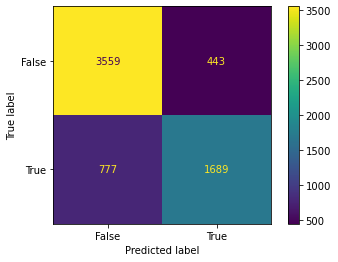

In [152]:
confusion_matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
confusion_matrix_display.plot()
plt.show()

In [153]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negative
FN = confusion_matrix[1,0] # false negative
FP = confusion_matrix[0,1] # false positive

#### Accuracy

- correctly predicted labels (TP + FN) / total number of labels

In [154]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
round(accuracy * 100,2)

81.14

#### Sensitivity

- true posiite rate  - how many correctly identified as 1

In [155]:
TPR = TP / (TP + FN)
round(TPR * 100,2)

68.49

#### Specificity

- true negative rate -  how many correctly identified as 0

In [156]:
TNR = TN / (TN + FP)
round(TNR * 100,2)

88.93

#### Precesion

- Probability that a predicted 'Yes' is actual 'Yes' Chance of you being right in identifying 'Yes'
- It is the same as 'Positive Predicted Value'

In [157]:
prec = TP /(TP + FP)
round(prec * 100,2)

79.22

#### Recall

- Probability that an actual 'Yes' case is predicted correctly.
- It is exactly the same as sensitivity.

In [158]:
rec = TP / (TP + FN)
round(rec * 100,2)

68.49

#### F1-Score

In [159]:
round(2 * ((prec * rec) / (prec + rec)) * 100,2)

73.47

#### ROC Curve

**shows tradeoff between the True Positive Rate (Sensitivity) and the False Positive Rate (Specificity) - any increase in Sensitivity will be accompanied by a decrease in Specificity**

In [160]:
def roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [161]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

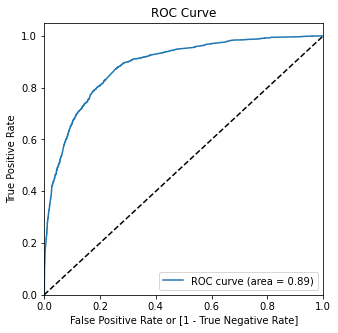

In [162]:
roc(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

**The ROC curve closer to left-hand and top-border of the ROC space.  Area under the curve is 89% and that is positive indicator of having good model**

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [163]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299669,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.217787,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.344889,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.841128,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.299669,3934,0,1,1,1,0,0,0,0,0,0,0


In [164]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cml = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cml))
    accuracy = (cml[0,0]+cml[1,1])/total1
    
    speci = cml[0,0]/(cml[0,0] + cml[0,1])
    sensi = cml[1,1] / (cml[1,0] + cml[1,1])
    
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.580396  0.981752  0.333083
0.2   0.2  0.767007  0.911192  0.678161
0.3   0.3  0.799320  0.831711  0.779360
0.4   0.4  0.810915  0.773317  0.834083
0.5   0.5  0.811379  0.684915  0.889305
0.6   0.6  0.801175  0.612733  0.917291
0.7   0.7  0.779839  0.512165  0.944778
0.8   0.8  0.762678  0.425385  0.970515
0.9   0.9  0.717378  0.276561  0.989005


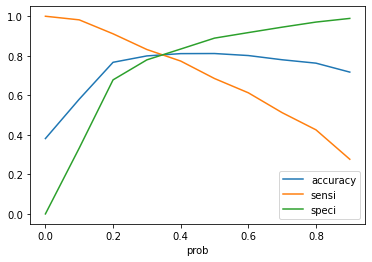

In [165]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

**At ~ 0.35 probability, all three metrics converge hence we can choose 0.35 as the optimal cut-off point.**

### Model Re-Evaluation with optimal cut-off

In [166]:
# change predicted values based on 0.35 cut-off
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299669,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.217787,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.344889,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.841128,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.299669,3934,0,1,1,1,0,0,0,0,0,0,0


### Confusion Matrix

In [167]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

print(confusion_matrix)

[[3225  777]
 [ 480 1986]]


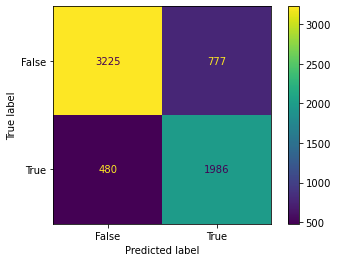

In [168]:
confusion_matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
confusion_matrix_display.plot()
plt.show()

In [169]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negative
FN = confusion_matrix[1,0] # false negative
FP = confusion_matrix[0,1] # false positive

#### Accuracy

- correctly predicted labels (TP + FN) / total number of labels

In [170]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
round(accuracy * 100,2)

80.57

#### Sensitivity

- true posiite rate  - how many correctly identified as 1

In [171]:
TPR = TP / (TP + FN)
round(TPR * 100,2)

80.54

#### Specificity

- true negative rate -  how many correctly identified as 0

In [172]:
TNR = TN / (TN + FP)
round(TNR * 100,2)

80.58

#### Precesion

- Probability that a predicted 'Yes' is actual 'Yes' Chance of you being right in identifying 'Yes'
- It is the same as 'Positive Predicted Value'

In [173]:
prec = TP /(TP + FP)
round(prec * 100,2)

71.88

#### Recall

- Probability that an actual 'Yes' case is predicted correctly.
- It is exactly the same as sensitivity.

In [174]:
rec = TP / (TP + FN)
round(rec * 100,2)

80.54

In [175]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

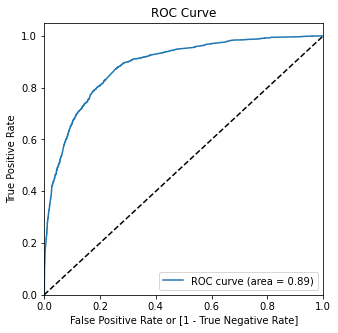

In [176]:
roc(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

#### Precesion and Recall Curve

In [177]:
from sklearn.metrics import precision_recall_curve

In [178]:
precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

(array([0.39025162, 0.39015511, 0.39021688, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99594485e-01, 9.99594485e-01, ...,
        8.11030008e-04, 4.05515004e-04, 0.00000000e+00]),
 array([0.02253442, 0.02261336, 0.02282606, ..., 0.99915155, 0.99921297,
        0.99931493]))

In [179]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)

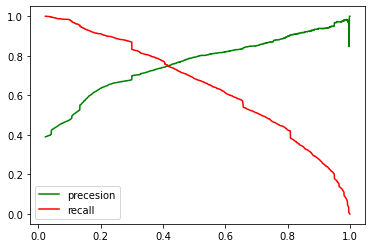

In [180]:
plt.plot(thresholds,p[:-1],"g-",label='precesion')
plt.plot(thresholds,r[:-1],"r-",label='recall')
plt.legend()
plt.show()

#### The optimal cut-off point as per precision-recall curve is ~0.4 and it matches closely with sensitivity - specificity trade-off

#### F1-score

combines both precision and recall. It is the basically harmonic mean of precesion and recall

In [181]:
round(2 * ((prec * rec) / (prec + rec)) * 100,2)

75.96

## 5. Making Prediction on Test Data

### Feature Scaling

In [182]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [183]:
X_test = X_test.drop(['TotalVisits','Country_India','Last Activity_SMS Sent',
                      'Last Activity_Page Visited on Website','Lead Origin_Lead Add Form',
                        'Last Activity_Email Opened','Lead Source_Others Lead Source',
                        'Last Activity_Email Bounced'],axis=1)

In [184]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Other Notable Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Foreign,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0,0.964504,2.892276,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2376,0,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7766,0,-0.777416,1.364995,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Select features given by RFE

In [185]:
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activities,Last Notable Activity_Other Notable Activities,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0,0
2376,0,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.885371,0,1,0,0,1,0,0,0,0,1,0
4359,0,-0.885371,0,0,1,0,0,0,0,0,0,1,0


### Adding Constant

In [186]:
X_test_sm = sm.add_constant(X_test)

In [187]:
y_test_pred = res.predict(X_test_sm)

In [188]:
# converitn y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.646864
2376,0.949446
7766,0.880438
9199,0.107097
4359,0.808548


In [189]:
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [190]:
# putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [191]:
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [192]:
# removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [193]:
# concat

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [194]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.646864
1,1,2376,0.949446
2,1,7766,0.880438
3,0,9199,0.107097
4,1,4359,0.808548


In [195]:
# rename the column

y_pred_final = y_pred_final.rename(columns={0:'Lead_Score_Prob'})

In [196]:
y_pred_final.head()

,Converted,Prospect ID,Lead_Score_Prob
0,1,4269,0.646864
1,1,2376,0.949446
2,1,7766,0.880438
3,0,9199,0.107097
4,1,4359,0.808548


In [197]:
# rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'],axis=1)

In [198]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob
0,4269,1,0.646864
1,2376,1,0.949446
2,7766,1,0.880438
3,9199,0,0.107097
4,4359,1,0.808548


In [199]:
y_pred_final['predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,predicted
0,4269,1,0.646864,1
1,2376,1,0.949446,1
2,7766,1,0.880438,1
3,9199,0,0.107097,0
4,4359,1,0.808548,1


In [200]:
confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.predicted)
confusion_matrix2

array([[1378,  299],
       [ 202,  893]], dtype=int64)

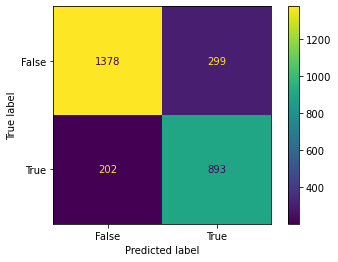

In [201]:
confusion_matrix_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2,display_labels=["False","True"])
confusion_matrix_display2.plot()
plt.show()

In [202]:
TP = confusion_matrix2[1,1] # true positive
TN = confusion_matrix2[0,0] # true negative
FN = confusion_matrix2[1,0] # false negative
FP = confusion_matrix2[0,1] # false positive

#### Accuracy

- correctly predicted labels (TP + FN) / total number of labels

In [203]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
round(accuracy * 100,2)

81.93

#### Sensitivity

- true posiite rate  - how many correctly identified as 1

In [204]:
TPR = TP / (TP + FN)
round(TPR * 100,2)

81.55

#### Specificity

- true negative rate -  how many correctly identified as 0

In [205]:
TNR = TN / (TN + FP)
round(TNR * 100,2)

82.17

#### Precesion

- Probability that a predicted 'Yes' is actual 'Yes' Chance of you being right in identifying 'Yes'
- It is the same as 'Positive Predicted Value'

In [206]:
prec = TP /(TP + FP)
round(prec * 100,2)

74.92

#### Recall

- Probability that an actual 'Yes' case is predicted correctly.
- It is exactly the same as sensitivity.

In [207]:
rec = TP / (TP + FN)
round(rec * 100,2)

81.55

#### F1-Score

In [208]:
round(2 * ((prec * rec) / (prec + rec)) * 100,2)

78.09

### Assigning Lead Score to the data set

In [209]:
# lead score to train data set
y_train_pred_final['Lead Score'] = y_train_pred_final.Lead_Score_Prob.map(lambda x:round(x * 100))
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
0,0,0.299669,1871,0,1,1,1,0,0,0,0,0,0,0,30
1,0,0.217787,6795,0,1,1,1,0,0,0,0,0,0,0,22
2,0,0.344889,3516,0,1,1,1,1,0,0,0,0,0,0,34
3,0,0.841128,8105,1,1,1,1,1,1,1,1,1,1,0,84
4,0,0.299669,3934,0,1,1,1,0,0,0,0,0,0,0,30


In [210]:
# lead score to test data set
y_pred_final['Lead Score'] = y_pred_final.Lead_Score_Prob.map(lambda x: round(x * 100))

y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,predicted,Lead Score
0,4269,1,0.646864,1,65
1,2376,1,0.949446,1,95
2,7766,1,0.880438,1,88
3,9199,0,0.107097,0,11
4,4359,1,0.808548,1,81


### Categorizing predicted leads into Hot Leads and Cold Leads using Lead score threshold 90.  

**CEO target of lead conversion rate i.e. 80% can be achieved if all the leads categorized as Hot Leads are focused for communication or nurturing.**

In [211]:
y_train_pred_final['Lead Type'] = y_train_pred_final['Lead Score'].map(lambda x: 'Hot Lead' if x > 90 else 'Cold Lead')

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score,Lead Type
0,0,0.299669,1871,0,1,1,1,0,0,0,0,0,0,0,30,Cold Lead
1,0,0.217787,6795,0,1,1,1,0,0,0,0,0,0,0,22,Cold Lead
2,0,0.344889,3516,0,1,1,1,1,0,0,0,0,0,0,34,Cold Lead
3,0,0.841128,8105,1,1,1,1,1,1,1,1,1,1,0,84,Cold Lead
4,0,0.299669,3934,0,1,1,1,0,0,0,0,0,0,0,30,Cold Lead


In [212]:
y_train_pred_final[y_train_pred_final['Lead Type'] == 'Hot Lead'].head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score,Lead Type
5,1,0.990785,4844,1,1,1,1,1,1,1,1,1,1,1,99,Hot Lead
7,1,0.995013,8071,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
9,1,0.937728,7423,1,1,1,1,1,1,1,1,1,1,1,94,Hot Lead
23,1,0.945472,2878,1,1,1,1,1,1,1,1,1,1,1,95,Hot Lead
24,1,0.991828,6167,1,1,1,1,1,1,1,1,1,1,1,99,Hot Lead


In [213]:
y_train_pred_final[y_train_pred_final['Lead Type'] == 'Hot Lead'].shape

(708, 16)

#### If X Education company targets all the 708 leads and nurture them then there is 80% chance of converting them

In [214]:
# list of significant features from the model 
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.143511
What is your current occupation_Working Professional    3.506252
Lead Source_Reference                                   3.277519
Last Notable Activity_SMS Sent                          1.492234
Last Notable Activity_Other Notable Activities          1.239027
What is your current occupation_Student                 1.156258
Total Time Spent on Website                             1.068789
What is your current occupation_Unemployed              1.027165
Lead Source_Olark Chat                                  0.988040
Last Activity_Other Last Activities                     0.709304
Lead Origin_Landing Page Submission                    -0.394077
Last Activity_Olark Chat Conversation                  -1.271873
Do Not Email                                           -1.574660
const                                                  -1.917805
dtype: float64

## Significant variables to which contribute most towards the probability of a lead getting converted:
### Lead Source_Welingak Website(coeff 5.14)
### What is your current occupation_Working Professional	(coeff 3.5)
### Lead Source_Reference(coeff 3.2)
### Last Notable Activity_SMS Sent( coeff 1.5)
### What is your current occupation_Student(coeff 1.15)